# Model Development

<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


Some questions we want to ask in this module

<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


<h4>Setup</h4>


 Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

load data and store in dataframe df:


In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [4]:
df['stroke']=df['stroke'].fillna(df['stroke'].mean())
df=df.dropna()

In [5]:
df.isna().sum()

,0
symboling,0
normalized-losses,0
make,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


In [6]:
df.shape

(200, 29)

<h3>1. Linear Regression and Multiple Linear Regression</h3>


<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Lets load the modules for linear regression</h4>


In [47]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

display(df.head())

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,0,0,1,0,2,0,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,2,0,1
1,3,122,0,0,1,0,2,0,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,2,0,1
2,1,122,0,0,1,2,2,0,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,2,0,1
3,2,164,1,0,0,3,1,0,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,2,0,1
4,2,164,1,0,0,3,0,0,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,2,0,1


In [48]:
correlation_matrix = df.corr()
correlation_matrix['price'].sort_values(ascending=False)

,price
price,1.000000
engine-size,0.872281
curb-weight,0.827789
horsepower,0.801507
city-L/100km,0.779960
width,0.743744
length,0.687952
wheel-base,0.589754
drive-wheels,0.585224
bore,0.544083


In [49]:
from sklearn.model_selection import train_test_split

<h4>Create the linear regression object</h4>


In [50]:
lr=LinearRegression()

<h4>How could Highway-mpg help us predict car price?</h4>


For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


<Axes: xlabel='highway-mpg', ylabel='price'>

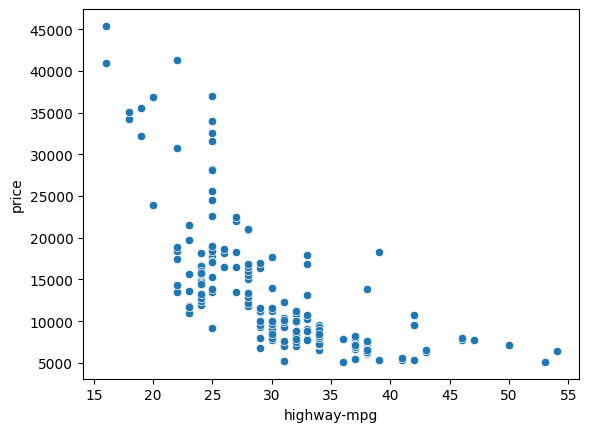

In [51]:
sns.scatterplot(df,x='highway-mpg',y='price')

Fit the linear model using highway-mpg.


In [52]:
X=df[['highway-mpg']]
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


In [53]:
lr.fit(X_train,y_train)

LinearRegression()

 We can output a prediction


In [54]:
y_pred=lr.predict(X_test[:5])
y_pred

array([10113.49016568, 18571.67846503,  7294.09406589, 10113.49016568,
       14342.58431535])

In [55]:
lr.intercept_

34078.35701383297

In [56]:
lr.coef_

array([-704.84902495])

<h3>What is the final estimated linear model we get?</h3>


As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object.</b>

</div>


In [57]:
lr=LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable.</b>

</div>


In [58]:
X=df[['engine-size']]
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
lr.fit(X,y)

(150, 1) (50, 1) (150,) (50,)


LinearRegression()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c):</h1>

<b>Find the slope and intercept of the model.</b>

</div>


In [59]:
lr.predict(X_test[:5])

array([12071.82692972, 27530.85554451,  7208.31230934,  8250.4940137 ,
       12245.52388045])

<h4>Slope</h4>


In [60]:
# Write your code below and press Shift+Enter to execute
lr.coef_

array([173.69695073])

<h4>Intercept</h4>


In [61]:
# Write your code below and press Shift+Enter to execute
lr.intercept_

-8771.807157640636

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 d): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or 'engine-size' and 'price'.</b>

</div>


In [62]:
lr.intercept_ + lr.coef_ * X

,engine-size
0,13808.796437
1,13808.796437
2,17630.129353
3,10161.160472
4,14850.978141
...,...
196,15719.462895
197,15719.462895
198,21277.765318
199,16414.250698


<h4>Multiple Linear Regression</h4>


<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$


$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


The equation is given by


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [63]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y=df['price']

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 4) (50, 4) (150,) (50,)


Fit the linear model using the four above-mentioned variables.


In [65]:
lr.fit(X,y)

LinearRegression()

What is the value of the intercept(a)?


In [66]:
lr.intercept_

-16800.459392261153

What are the values of the coefficients (b1, b2, b3, b4)?


In [67]:
lr.coef_

array([57.8554687 ,  4.35202741, 89.40982352, 52.3501046 ])

 What is the final estimated linear model that we get?


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and  'highway-mpg'.
</div>


In [68]:
# Write your code below and press Shift+Enter to execute
lm2=LinearRegression()
y=df['price']
X=df[['normalized-losses','highway-mpg']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
lr.fit(X_train,y_train)
lr.predict(X_test[:5])

(150, 2) (50, 2) (150,) (50,)


array([ 9983.39398152, 18464.70889284,  7509.71371272, 10586.48567422,
       14126.77858352])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficient of the model?</b>
</div>


In [69]:
# Write your code below and press Shift+Enter to execute
lr.coef_

array([   9.72728537, -693.80652879])

<h3>2)  Model Evaluation using Visualization</h3>


Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.


Import the visualization package: seaborn


In [70]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


 Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48170.19459587636)

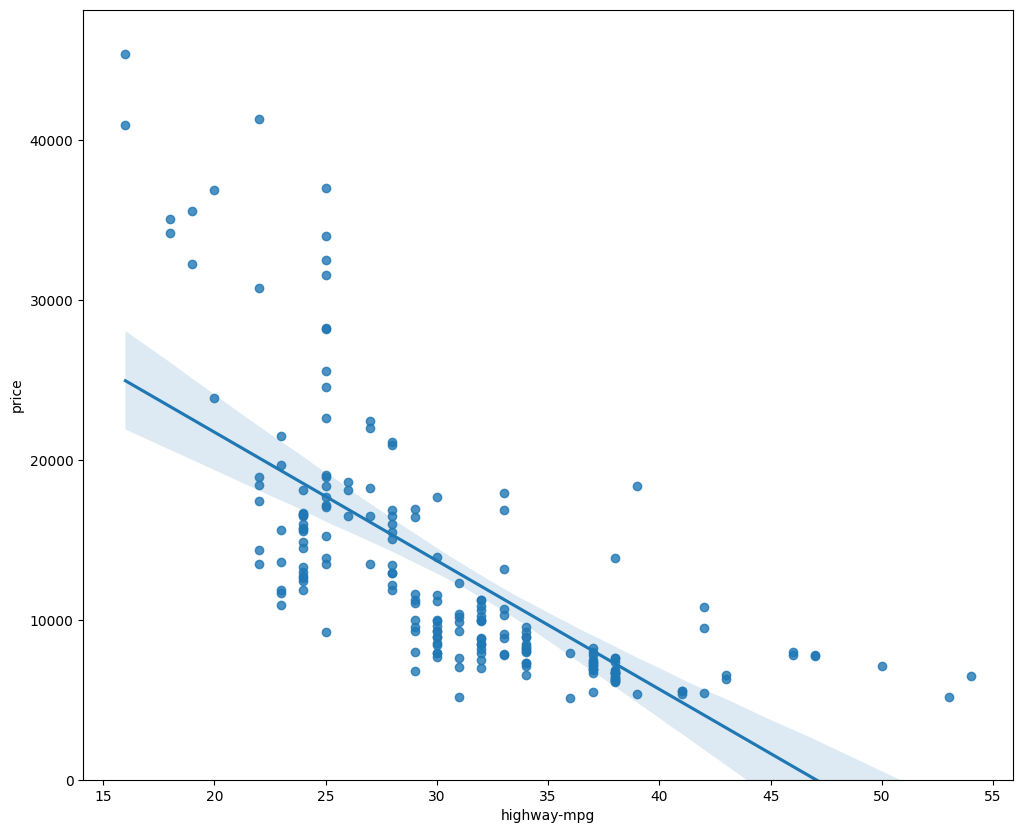

In [71]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 47414.1)

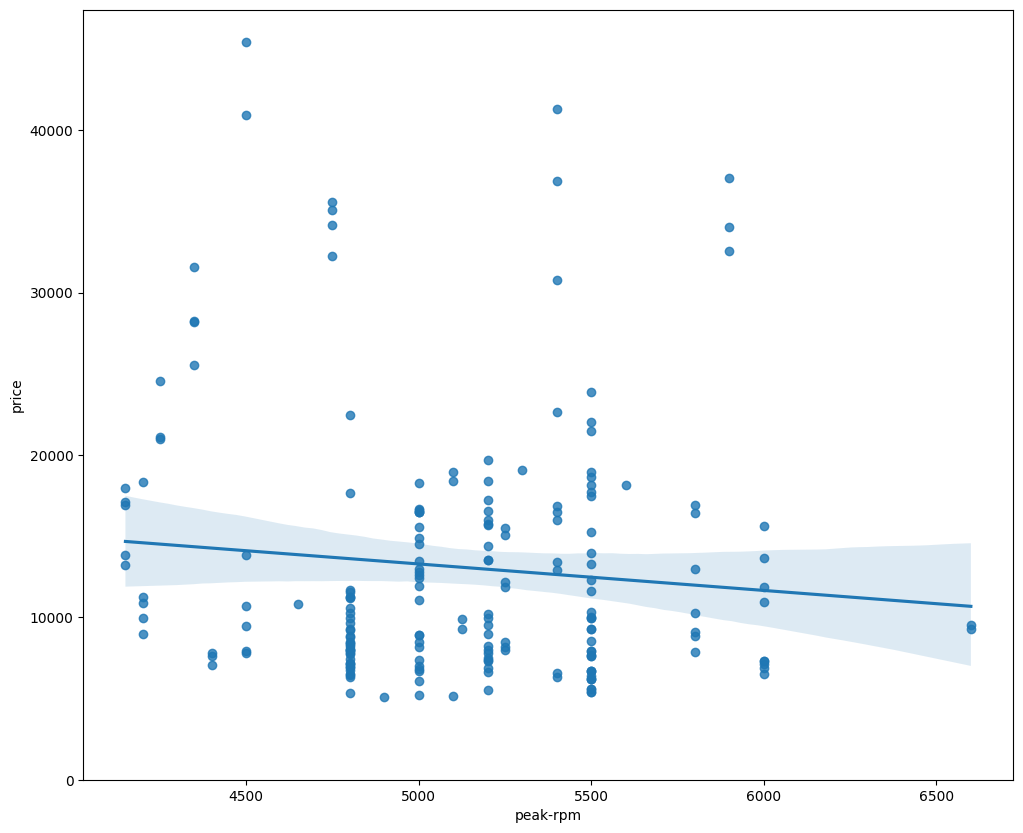

In [72]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, which of the two variables is more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


In [73]:
corr=df.corr()
corr['price'].sort_values(ascending=False)[1:3]

,price
engine-size,0.872281
curb-weight,0.827789


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


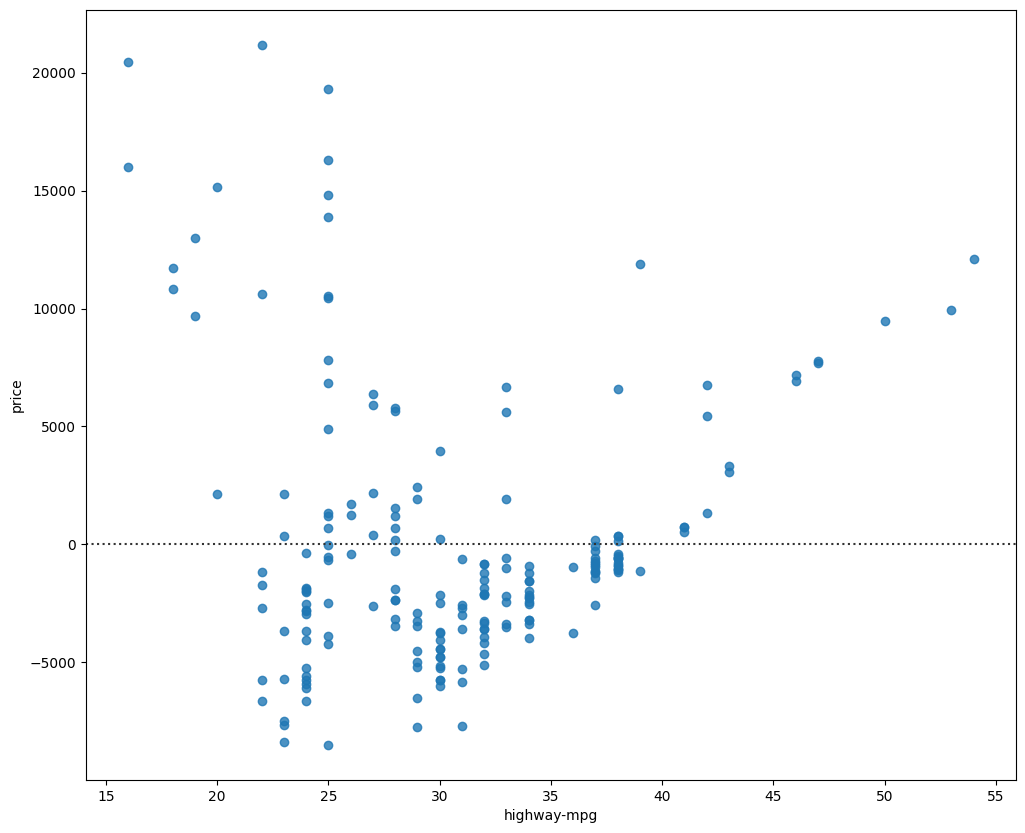

In [74]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data=df, x='highway-mpg', y='price')
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [180]:
from sklearn.preprocessing import StandardScaler
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)

First lets make a prediction


In [183]:
y_hat

array([ 8837.5504603 , 22455.98666663,  8292.29815683,  7168.01263903,
        5735.5462145 , 11514.68700737, 16564.64641755, 18059.72984938,
       14393.40888502, 10947.15090049,  7220.54869632,  1137.55581184,
        5422.6248145 ,  9561.67840595,  9074.45355303, 19870.59075292,
       19276.2171543 ,  9758.03970758, 16467.38101568,  5889.20016736,
        7220.78767954,  6275.28182417, 17490.47326209, 17750.48604386,
        9694.60574984, 18333.68364161,  6969.25290476, 24075.00310728,
        5659.4364911 ,  9295.25578343,  9030.69410672,  5886.1111116 ,
        5941.92516518,  5900.49396284, 13369.28789236, 17983.07722225,
       13702.1464543 , 37611.61898272,  6864.31144778, 11027.77903473,
       15615.78289955, 12301.98659706, 11103.62132959, 22133.18264672,
        9973.81760595, 10652.91711247, 11576.98309299, 16636.53823633,
       16864.90891652, 10922.05577182])

In [184]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_hat)

10350852.376162801

In [185]:
from sklearn.metrics import r2_score
r2_score(y_test,y_hat)

0.8055801175432384

<ipython-input-186-4f897d77671c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-186-4f897d77671c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False, color="b", label="Fitted Values

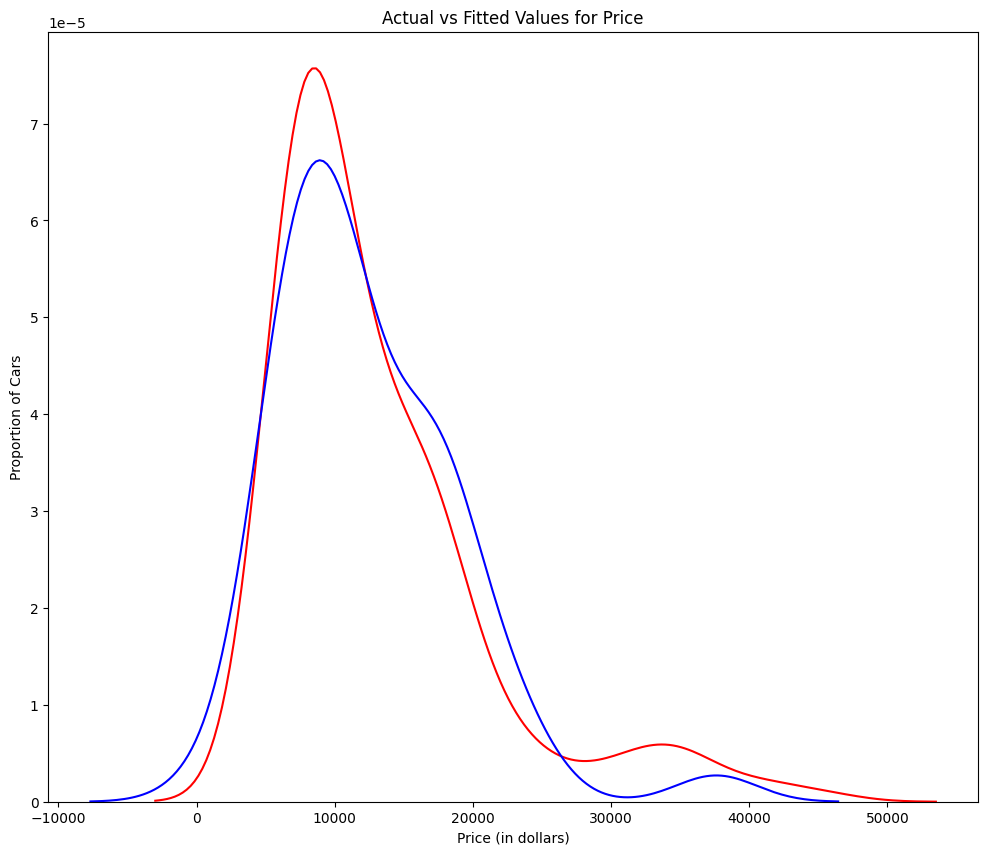

In [186]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>Part 3: Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


In [132]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Lets get the variables


In [191]:
#define x and y
x=df['highway-mpg']
y=df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [192]:
# Here we use a polynomial of the 3rd order (cubic) using polyfit and poly1d
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.582 x + 207.6 x - 9066 x + 1.391e+05


 Let's plot the function


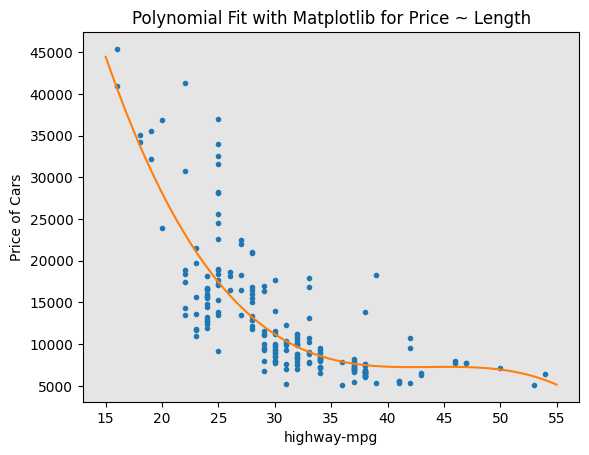

In [193]:
PlotPolly(p, x, y, 'highway-mpg')

In [194]:
np.polyfit(x, y, 3)

array([-1.58173625e+00,  2.07560887e+02, -9.06627053e+03,  1.39087550e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above?</b>
</div>


In [195]:
# Write your code below and press Shift+Enter to execute
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-9.742e-09 x  + 3.674e-06 x  - 0.0006192 x + 0.06152 x - 3.999 x
          6        5             4             3             2
 + 178.4 x - 5567 x + 1.214e+05 x - 1.811e+06 x + 1.759e+07 x - 1e+08 x + 2.521e+08


<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


In [205]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y=df['price']

We create a <b>PolynomialFeatures</b> object of degree 2:


In [208]:
#We create a PolynomialFeatures object of degree 2 and fit:
poly = PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x.values.reshape(-1, 1))

In [209]:
x_poly.shape

(200, 3)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted Values:", y_pred)

Predicted Values: [10498.81295621 24398.92937433  6423.40228927  7567.55312221
 12841.18014513 10068.55764093 46145.32584874 10650.27577373
 19376.25862734 32306.5923995  23769.84890748  9290.26732383
 14111.95641406 17228.11800397 13518.30867956  9312.40031811
 10290.84435195  7297.02754136 10426.94312032 28204.06764306
 29065.77759367 24274.51546421  8306.19356309  6809.5037735
 21227.69084294 10371.72060867 11990.66943537 28266.00091655
 12375.15519603 16952.66767365 10803.66599564  6267.75577605
 10162.07561416 10089.5702734  19642.38936487 18161.0324608
  8344.13736092  8592.06906014 13931.24125982 11942.54269451]


The original data is of 201 samples and 4 features


(201, 4)

after the transformation, there 201 samples and 15 features


(201, 15)

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [211]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [232]:
#create a pipeline of list with standard scalrer, poly features and the model to be used
X = df.drop('price',axis=1)
y=df['price']

In [233]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

In [234]:
y_pred = pipeline.predict(X_test)
y_pred

array([  7367.94882304,  12748.92221417,  -1593.67074793,   6780.71549338,
        14663.18509924,   7809.77009124, 212373.74212439,  10105.82960334,
        15208.38813937,  32291.15220995,  28642.68919895,   3807.12630972,
        12931.816853  ,  13968.56127429,  16531.93976927,   8092.46502233,
        10244.47364775,   7379.49296167,  10037.42935143,  72037.5294537 ,
        36920.48588228, -10882.62577304,  13372.73427353,   7034.09160857,
        25489.80243103,  10108.60173867,  11043.10658026,  66382.49373569,
        11919.19833699,  16968.58313165,  13898.8120275 ,   3685.32908406,
        10487.79966492,   8568.18330989,  72803.22755119,  17706.7319543 ,
         6905.8190273 ,   8246.5169928 ,   9830.29926027,  10369.66603162])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y</b>
</div>


In [242]:

X=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Display results
print("Predicted Values:", y_pred)



Predicted Values: [ 4014.38164346  5749.60735033  6091.42590134 23113.29187369
  6867.6856195  13149.89708131 10223.5360076   5836.25176703
 13643.04293297 15960.75028372  5866.3238173  10591.72893373
  5025.29015438 36147.41233798  8817.57335178  5773.10826415
  7483.8130264   5866.3238173  13828.84235167 14610.3824962
 16727.27776816 17252.50186952 26878.27766727  7298.12773804
  6585.44992658 15202.09324842 11815.30432312 13765.17882424
  5932.01401197 19851.9698431   9264.8353315   5732.1786905
 24898.68895685  6001.86759174 11815.30432312 11162.14004836
  5866.3238173  21650.41378911  6176.94229219 16605.25600724]


<h2>Part 4: Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2


In [245]:
r2_score(y_test, y_pred)

0.8697356833466151

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


lets import the function <b>mean_squared_error</b> from the module <b>metrics</b>


In [246]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results


In [247]:
mean_squared_error(y_test, y_pred)

9314997.022189092

<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2


In [248]:
# fit the model
lr.fit(X_train, y_train)
yhat=lr.predict(X_test)
# Find the R^2
r2_score(y_test, yhat)

0.869735683346615

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE


 we produce a prediction


In [249]:
mean_squared_error(y_test,y_pred)

9314997.022189092

 we compare the predicted results with the actual results


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2


let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function


In [253]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2


In [254]:
r2_score(y_test, y_pred)

0.8697356833466151

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit


<h3>MSE</h3>


We can also calculate the MSE:  


In [255]:
mean_squared_error(y_test, y_pred)

9314997.022189092

<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [256]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Create a new input


In [262]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
y = 3 * new_input + 10 + np.random.randn(*new_input.shape) * 10

 Fit the model


In [266]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Step 1: Standardize the data
    ('regressor', LinearRegression())    # Step 2: Perform linear regression
])

# Fit the pipeline to the training data
pipeline.fit(new_input, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Produce a prediction


In [267]:
y_pred = pipeline.predict(new_input)


we can plot the data


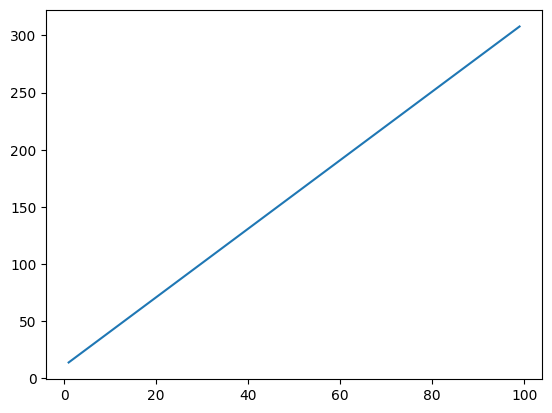

In [268]:
plt.plot(new_input, y_pred)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.


<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion:</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>
